In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [2]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=42)

<Axes: >

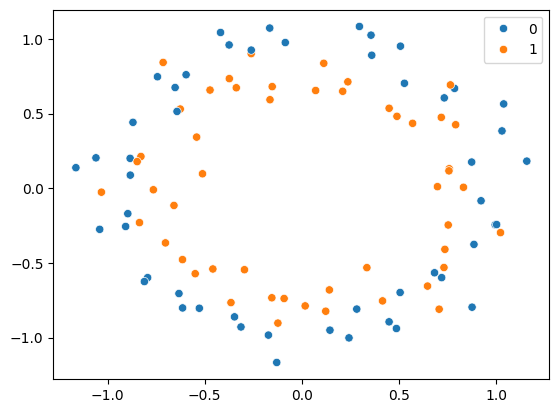

In [3]:
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [5]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\write\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 267ms/step - accuracy: 0.4781 - loss: 0.6918 - val_accuracy: 0.3500 - val_loss: 0.6963
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5484 - loss: 0.6864 - val_accuracy: 0.4000 - val_loss: 0.7007
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5461 - loss: 0.6860 - val_accuracy: 0.3500 - val_loss: 0.7055
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5656 - loss: 0.6795 - val_accuracy: 0.3500 - val_loss: 0.7100
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5148 - loss: 0.6882 - val_accuracy: 0.3500 - val_loss: 0.7136
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5617 - loss: 0.6782 - val_accuracy: 0.3500 - val_loss: 0.7185
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5656 - loss: 0.6779 - val_accuracy: 0.3500 - val_loss: 0.7221
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5461 - loss: 0.6761 - val_accuracy: 0.3500 - 

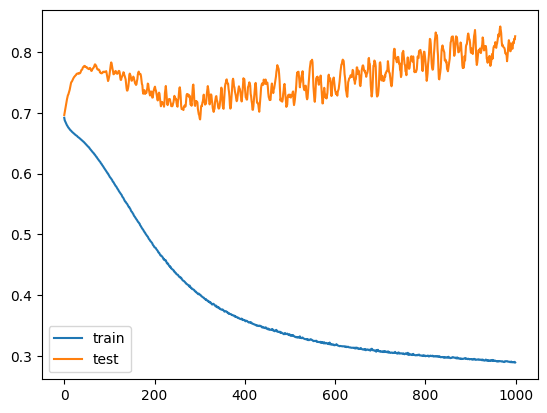

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

# Hence we observe that here is a data over fitting

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


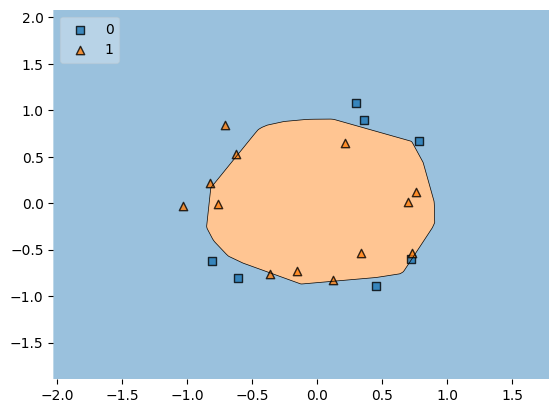

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

# Early Stopping
#### to prevent data over fitting

In [10]:
model = Sequential()

In [11]:
model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [14]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 277ms/step - accuracy: 0.4875 - loss: 0.6919 - val_accuracy: 0.3500 - val_loss: 0.6980
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5539 - loss: 0.6875 - val_accuracy: 0.3500 - val_loss: 0.7048
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5461 - loss: 0.6853 - val_accuracy: 0.3500 - val_loss: 0.7115
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5344 - loss: 0.6832 - val_accuracy: 0.3500 - val_loss: 0.7178
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5422 - loss: 0.6821 - val_accuracy: 0.3500 - val_loss: 0.7231
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.5383 - loss: 0.6813 - val_accuracy: 0.3500 - val_loss: 0.7280
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.5227 - loss: 0.6843 - val_accuracy: 0.3500 - val_loss: 0.7324
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.5461 - loss: 0.6738 - val_accuracy: 0.3500 -

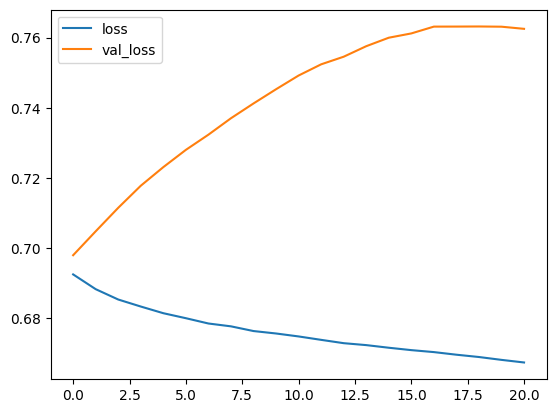

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


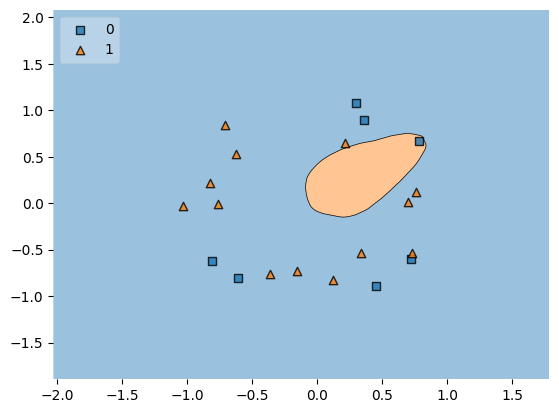

In [16]:
plot_decision_regions(X_test, y_test.ravel(), clf=model, legend=2)
plt.show()

# Early Stopping

In [17]:
tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",  # Metric to track for stopping (e.g., 'val_loss', 'val_accuracy', etc.).
    min_delta=0,  # Minimum required change in the monitored metric to be considered an improvement.
    patience=0,  # Number of epochs to wait without improvement before stopping training.
    verbose=0,  # Set to 1 or 2 to display messages when training stops early.
    mode='auto',  # 'min' stops when the value decreases, 'max' stops when it increases, 'auto' decides automatically.
    baseline=None,  # Training stops if the metric reaches this specific value.
    restore_best_weights=False  # If True, restores model weights from the best epoch after stopping.
)
